Komoditas Kakao 2021

In [1]:
# import lib
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt

In [2]:
# read the dataset
df = pd.read_excel("./datamaster.xlsx", sheet_name="2021")
# Show dataset
df

,No,Provinsi,Luas_Areal_2021,Produktiv_2021,Produksi_2021,Jumlah_Petani,Areal_Perkebunan_Rakyat,Areal_Perkebunan_Pemerintah,Areal_Perkebunan_Swasta,Tanaman_Imature,Tanaman_Mature,Tanaman_Damage
0,1.0,Aceh,98276.0,712.0,40948.0,128212.0,98276.0,NaN,NaN,26649.0,57546.0,14081.0
1,2.0,Sumatera Utara,54653.0,970.0,35880.0,79267.0,54467.0,NaN,186.0,12857.0,36985.0,4811.0
2,3.0,Sumatera Barat,67804.0,891.0,40201.0,93028.0,67456.0,NaN,347.0,11356.0,45117.0,11331.0
3,4.0,Riau,3752.0,451.0,959.0,13200.0,3752.0,NaN,NaN,917.0,2128.0,707.0
4,5.0,Kepulauan Riau,34.0,1108.0,7.0,188.0,34.0,NaN,NaN,24.0,7.0,3.0
5,6.0,Jambi,2805.0,587.0,929.0,6235.0,2805.0,NaN,NaN,840.0,1582.0,383.0
6,7.0,Sumatera Selatan,8047.0,734.0,3017.0,7824.0,8047.0,NaN,NaN,3434.0,4109.0,504.0
7,8.0,Kepulauan Bangka Belitung,706.0,726.0,359.0,815.0,706.0,NaN,NaN,171.0,494.0,41.0
8,9.0,Bengkulu,7154.0,702.0,3751.0,11643.0,7154.0,NaN,NaN,1051.0,5347.0,756.0
9,10.0,Lampung,77391.0,876.0,54796.0,138625.0,77092.0,NaN,299.0,6408.0,62585.0,8398.0


In [3]:
#  Drop data line 10 and 34 = 10 jakarta yang tidak memiliki komoditas kakao, 34 Indonesia bukan provinsi
df = df.drop([10, 34])
# buang kolom No dan Provinsi karena tidak relevan dengan analisis
df = df.drop(['No', 'Provinsi'], axis=1)
# Show dataset
df

,Luas_Areal_2021,Produktiv_2021,Produksi_2021,Jumlah_Petani,Areal_Perkebunan_Rakyat,Areal_Perkebunan_Pemerintah,Areal_Perkebunan_Swasta,Tanaman_Imature,Tanaman_Mature,Tanaman_Damage
0,98276.0,712.0,40948.0,128212.0,98276.0,NaN,NaN,26649.0,57546.0,14081.0
1,54653.0,970.0,35880.0,79267.0,54467.0,NaN,186.0,12857.0,36985.0,4811.0
2,67804.0,891.0,40201.0,93028.0,67456.0,NaN,347.0,11356.0,45117.0,11331.0
3,3752.0,451.0,959.0,13200.0,3752.0,NaN,NaN,917.0,2128.0,707.0
4,34.0,1108.0,7.0,188.0,34.0,NaN,NaN,24.0,7.0,3.0
5,2805.0,587.0,929.0,6235.0,2805.0,NaN,NaN,840.0,1582.0,383.0
6,8047.0,734.0,3017.0,7824.0,8047.0,NaN,NaN,3434.0,4109.0,504.0
7,706.0,726.0,359.0,815.0,706.0,NaN,NaN,171.0,494.0,41.0
8,7154.0,702.0,3751.0,11643.0,7154.0,NaN,NaN,1051.0,5347.0,756.0
9,77391.0,876.0,54796.0,138625.0,77092.0,NaN,299.0,6408.0,62585.0,8398.0


In [4]:
df = df.fillna(df.mean()) # Nilai missing value diisi dengan rata-rata
# df = df.fillna(df.min()) # Nilai missing value diisi dengan nilai minimum
# df = df.fillna(df.max()) # Nilai missing value diisi dengan nilai maximum
# df = df.dropna() # Drop baris yang masih ada missing value

df

,Luas_Areal_2021,Produktiv_2021,Produksi_2021,Jumlah_Petani,Areal_Perkebunan_Rakyat,Areal_Perkebunan_Pemerintah,Areal_Perkebunan_Swasta,Tanaman_Imature,Tanaman_Mature,Tanaman_Damage
0,98276.0,712.0,40948.0,128212.0,98276.0,218.0,1147.3,26649.0,57546.0,14081.0
1,54653.0,970.0,35880.0,79267.0,54467.0,218.0,186.0,12857.0,36985.0,4811.0
2,67804.0,891.0,40201.0,93028.0,67456.0,218.0,347.0,11356.0,45117.0,11331.0
3,3752.0,451.0,959.0,13200.0,3752.0,218.0,1147.3,917.0,2128.0,707.0
4,34.0,1108.0,7.0,188.0,34.0,218.0,1147.3,24.0,7.0,3.0
5,2805.0,587.0,929.0,6235.0,2805.0,218.0,1147.3,840.0,1582.0,383.0
6,8047.0,734.0,3017.0,7824.0,8047.0,218.0,1147.3,3434.0,4109.0,504.0
7,706.0,726.0,359.0,815.0,706.0,218.0,1147.3,171.0,494.0,41.0
8,7154.0,702.0,3751.0,11643.0,7154.0,218.0,1147.3,1051.0,5347.0,756.0
9,77391.0,876.0,54796.0,138625.0,77092.0,218.0,299.0,6408.0,62585.0,8398.0


In [5]:
# rubah semua kolom ke int64 agar bisa diolah menggunakan algoritma KMeans
df = df.astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 0 to 33
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Luas_Areal_2021              33 non-null     int64
 1   Produktiv_2021               33 non-null     int64
 2   Produksi_2021                33 non-null     int64
 3   Jumlah_Petani                33 non-null     int64
 4   Areal_Perkebunan_Rakyat      33 non-null     int64
 5   Areal_Perkebunan_Pemerintah  33 non-null     int64
 6   Areal_Perkebunan_Swasta      33 non-null     int64
 7   Tanaman_Imature              33 non-null     int64
 8   Tanaman_Mature               33 non-null     int64
 9   Tanaman_Damage               33 non-null     int64
dtypes: int64(10)
memory usage: 2.8 KB


In [6]:
# Final dataset siap diolah menggunakan algoritma KMeans
df

,Luas_Areal_2021,Produktiv_2021,Produksi_2021,Jumlah_Petani,Areal_Perkebunan_Rakyat,Areal_Perkebunan_Pemerintah,Areal_Perkebunan_Swasta,Tanaman_Imature,Tanaman_Mature,Tanaman_Damage
0,98276,712,40948,128212,98276,218,1147,26649,57546,14081
1,54653,970,35880,79267,54467,218,186,12857,36985,4811
2,67804,891,40201,93028,67456,218,347,11356,45117,11331
3,3752,451,959,13200,3752,218,1147,917,2128,707
4,34,1108,7,188,34,218,1147,24,7,3
5,2805,587,929,6235,2805,218,1147,840,1582,383
6,8047,734,3017,7824,8047,218,1147,3434,4109,504
7,706,726,359,815,706,218,1147,171,494,41
8,7154,702,3751,11643,7154,218,1147,1051,5347,756
9,77391,876,54796,138625,77092,218,299,6408,62585,8398


In [7]:
x_train = df[['Luas_Areal_2021','Produktiv_2021','Produksi_2021','Jumlah_Petani','Areal_Perkebunan_Rakyat','Areal_Perkebunan_Pemerintah','Areal_Perkebunan_Swasta','Tanaman_Imature','Tanaman_Mature','Tanaman_Damage']].values
x_train

array([[ 98276,    712,  40948, 128212,  98276,    218,   1147,  26649,
         57546,  14081],
       [ 54653,    970,  35880,  79267,  54467,    218,    186,  12857,
         36985,   4811],
       [ 67804,    891,  40201,  93028,  67456,    218,    347,  11356,
         45117,  11331],
       [  3752,    451,    959,  13200,   3752,    218,   1147,    917,
          2128,    707],
       [    34,   1108,      7,    188,     34,    218,   1147,     24,
             7,      3],
       [  2805,    587,    929,   6235,   2805,    218,   1147,    840,
          1582,    383],
       [  8047,    734,   3017,   7824,   8047,    218,   1147,   3434,
          4109,    504],
       [   706,    726,    359,    815,    706,    218,   1147,    171,
           494,     41],
       [  7154,    702,   3751,  11643,   7154,    218,   1147,   1051,
          5347,    756],
       [ 77391,    876,  54796, 138625,  77092,    218,    299,   6408,
         62585,   8398],
       [  9764,    455,   2199

In [8]:
# Normalisasi data agar semua kolom memiliki range nilai yang sama tidak jomplang yang akan mempengaruhi hasil clustering
#  Standar Scaler adalah salah satu metode normalisasi data yang paling sering digunakan untuk mengubah data menjadi distribusi normal dengan mean = 0 dan standard deviation = 1
# (x - mean(x)) / std(x) = (x - u) / s  (u = mean(x), s = std(x)) 
# (x = nilai data, mean(x) = rata-rata, std(x) = standar deviasi)  (u = nilai rata-rata, s = nilai standar deviasi)
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df_scaled = scaler.fit_transform(df)
# df_scaled

# MinMaxScaler adalah salah satu metode normalisasi data yang paling sering digunakan untuk mengubah data menjadi distribusi normal dengan nilai minimum = 0 dan nilai maksimum = 1
# (x - min(x)) / (max(x) - min(x)) = (x - a) / (b - a)  (a = min(x), b = max(x))
# (x = nilai data, min(x) = nilai minimum, max(x) = nilai maksimum)  (a = nilai minimum, b = nilai maksimum)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(x_train)
df_scaled

# Perbedaan antara Standard Scaler dan MinMax Scaler adalah Standard Scaler mengubah data menjadi distribusi normal dengan mean = 0 dan standard deviation = 1 sedangkan MinMax Scaler mengubah data menjadi distribusi normal dengan nilai minimum = 0 dan nilai maksimum = 1
# Standard Scaler lebih cocok digunakan untuk data yang memiliki distribusi normal sedangkan MinMax Scaler lebih cocok digunakan untuk data yang memiliki distribusi tidak normal contohnya data yang memiliki nilai outlier yang sangat besar atau sangat kecil sehingga mengganggu distribusi normal data tersebut sehingga perlu dilakukan normalisasi data dengan MinMax Scaler agar nilai outlier tersebut tidak terlalu mempengaruhi hasil clustering, sedangkan Standard Scaler tidak cocok digunakan untuk data yang memiliki nilai outlier yang sangat besar atau sangat kecil karena nilai outlier tersebut akan sangat mempengaruhi hasil clustering sehingga hasil clustering tidak akurat lagi.

array([[3.55575663e-01, 4.94252874e-01, 2.82700713e-01, 5.98122807e-01,
        3.55575663e-01, 3.43642612e-01, 2.29208517e-01, 7.43009432e-01,
        3.09018845e-01, 2.59468824e-01],
       [1.97687213e-01, 8.23754789e-01, 2.47705789e-01, 3.69453801e-01,
        1.97014007e-01, 3.43642612e-01, 3.61591000e-02, 3.58123570e-01,
        1.98593977e-01, 8.86152939e-02],
       [2.45285750e-01, 7.22860792e-01, 2.77542622e-01, 4.33744621e-01,
        2.44026204e-01, 3.43642612e-01, 6.85014062e-02, 3.16235977e-01,
        2.42267681e-01, 2.08784120e-01],
       [1.34568750e-02, 1.60919540e-01, 6.57363228e-03, 6.07915232e-02,
        1.34568750e-02, 3.43642612e-01, 2.29208517e-01, 2.49204666e-02,
        1.13910386e-02, 1.29752843e-02],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.43642612e-01, 2.29208517e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00293170e-02, 3.34610473e-01, 6.36648000e-03, 2.82513327e-02,
   

K Means Clustering

In [9]:
# KDD Step 3: Data Reduction
# KMeans Clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=30).fit(df_scaled)
kmeans.labels_ # menampilkan hasil clustering

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0])

In [10]:
# tampilkan centroid dari cluster 0
kmeans.cluster_centers_[0]

array([0.0779713 , 0.40014093, 0.06736854, 0.15206113, 0.07645328,
       0.34364261, 0.2292293 , 0.13995473, 0.07100431, 0.06077017])

In [11]:
# tampilkan centroid dari cluster 1
kmeans.cluster_centers_[1]

array([0.77115621, 0.53416347, 0.78281292, 0.78855767, 0.77115621,
       0.34364261, 0.22920852, 0.69252665, 0.77918517, 0.7955333 ])

In [12]:
# tampilkan centroid dari cluster 2
# kmeans.cluster_centers_[2]

In [13]:
# Menambahkan kolom cluster ke dalam dataset
df['cluster'] = kmeans.labels_
df

,Luas_Areal_2021,Produktiv_2021,Produksi_2021,Jumlah_Petani,Areal_Perkebunan_Rakyat,Areal_Perkebunan_Pemerintah,Areal_Perkebunan_Swasta,Tanaman_Imature,Tanaman_Mature,Tanaman_Damage,cluster
0,98276,712,40948,128212,98276,218,1147,26649,57546,14081,0
1,54653,970,35880,79267,54467,218,186,12857,36985,4811,0
2,67804,891,40201,93028,67456,218,347,11356,45117,11331,0
3,3752,451,959,13200,3752,218,1147,917,2128,707,0
4,34,1108,7,188,34,218,1147,24,7,3,0
5,2805,587,929,6235,2805,218,1147,840,1582,383,0
6,8047,734,3017,7824,8047,218,1147,3434,4109,504,0
7,706,726,359,815,706,218,1147,171,494,41,0
8,7154,702,3751,11643,7154,218,1147,1051,5347,756,0
9,77391,876,54796,138625,77092,218,299,6408,62585,8398,0


In [14]:
# Menampilkan jumlah data pada setiap cluster
df['cluster'].value_counts()

0    29
1     4
Name: cluster, dtype: int64

Evaluasi K Means Clustering

In [15]:
# tingkat akurasi dari clustering k means menggunakan Silhouette Coefficient (SC)
from sklearn.metrics import silhouette_score
print("Silhouette Coefficient (SC) =", silhouette_score(df_scaled, kmeans.labels_))

Silhouette Coefficient (SC) = 0.6499444727913803


nilai Silhouette Coefficient (mendekati 1 Positive) yang artinya cluster terpisah satu sama lain dan dibedakan dengan jelas. 

In [16]:
# tingkat akurasi dari clustering k means menggunakan Davies Bouldin Index (DBI)
from sklearn.metrics import davies_bouldin_score
print("Davies Bouldin Index (DBI) =", davies_bouldin_score(df_scaled, kmeans.labels_))
davies_bouldin_score

Davies Bouldin Index (DBI) = 0.5210328463121607


<function sklearn.metrics.cluster._unsupervised.davies_bouldin_score(X, labels)>

Indeks ini menandakan rata-rata 'similaritas' antar cluster, dimana kesamaan adalah ukuran yang membandingkan jarak antar cluster dengan ukuran cluster itu sendiri.

Nol adalah skor serendah mungkin. Nilai yang mendekati nol menunjukkan partisi yang baik.

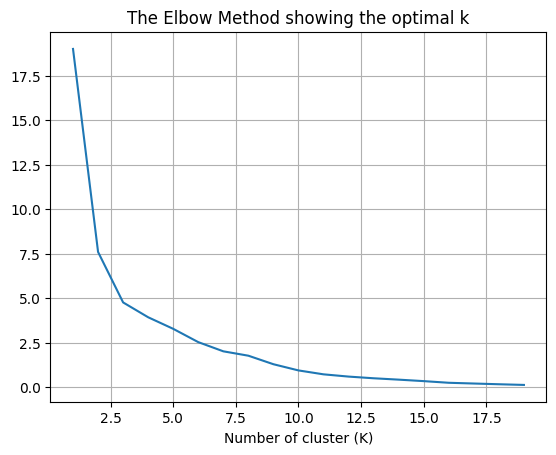

{1: 19.020870697562327,
 2: 7.614904362441813,
 3: 4.778807863252519,
 4: 3.945707859954348,
 5: 3.2953436278384043,
 6: 2.5486675996826498,
 7: 2.0322983869720774,
 8: 1.7862855652648246,
 9: 1.30753368996982,
 10: 0.9592439708054027,
 11: 0.7394770382142251,
 12: 0.6127512801266093,
 13: 0.5185088566334716,
 14: 0.4411204807118662,
 15: 0.3580489490198789,
 16: 0.26515625443958113,
 17: 0.22333333150272452,
 18: 0.1823721493479976,
 19: 0.1447058673879822}

In [17]:
# Optimasi jumlah cluster menggunakan Elbow Method
# Menampilkan nilai SSE untuk setiap jumlah cluster
sse = {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_scaled)
    df["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster (K)")
plt.title('The Elbow Method showing the optimal k')
plt.grid()
plt.show()

# tampilkan seluruh nilai SSE 
sse

In [18]:
# how to add column provinsi to df
df_provinsi = pd.read_excel("./datamaster.xlsx", sheet_name="2021", usecols="B")
df['Provinsi'] = df_provinsi
# drop column clusters
df.drop(columns=['clusters'], inplace=True)
df

,Luas_Areal_2021,Produktiv_2021,Produksi_2021,Jumlah_Petani,Areal_Perkebunan_Rakyat,Areal_Perkebunan_Pemerintah,Areal_Perkebunan_Swasta,Tanaman_Imature,Tanaman_Mature,Tanaman_Damage,cluster,Provinsi
0,98276,712,40948,128212,98276,218,1147,26649,57546,14081,0,Aceh
1,54653,970,35880,79267,54467,218,186,12857,36985,4811,0,Sumatera Utara
2,67804,891,40201,93028,67456,218,347,11356,45117,11331,0,Sumatera Barat
3,3752,451,959,13200,3752,218,1147,917,2128,707,0,Riau
4,34,1108,7,188,34,218,1147,24,7,3,0,Kepulauan Riau
5,2805,587,929,6235,2805,218,1147,840,1582,383,0,Jambi
6,8047,734,3017,7824,8047,218,1147,3434,4109,504,0,Sumatera Selatan
7,706,726,359,815,706,218,1147,171,494,41,0,Kepulauan Bangka Belitung
8,7154,702,3751,11643,7154,218,1147,1051,5347,756,0,Bengkulu
9,77391,876,54796,138625,77092,218,299,6408,62585,8398,0,Lampung


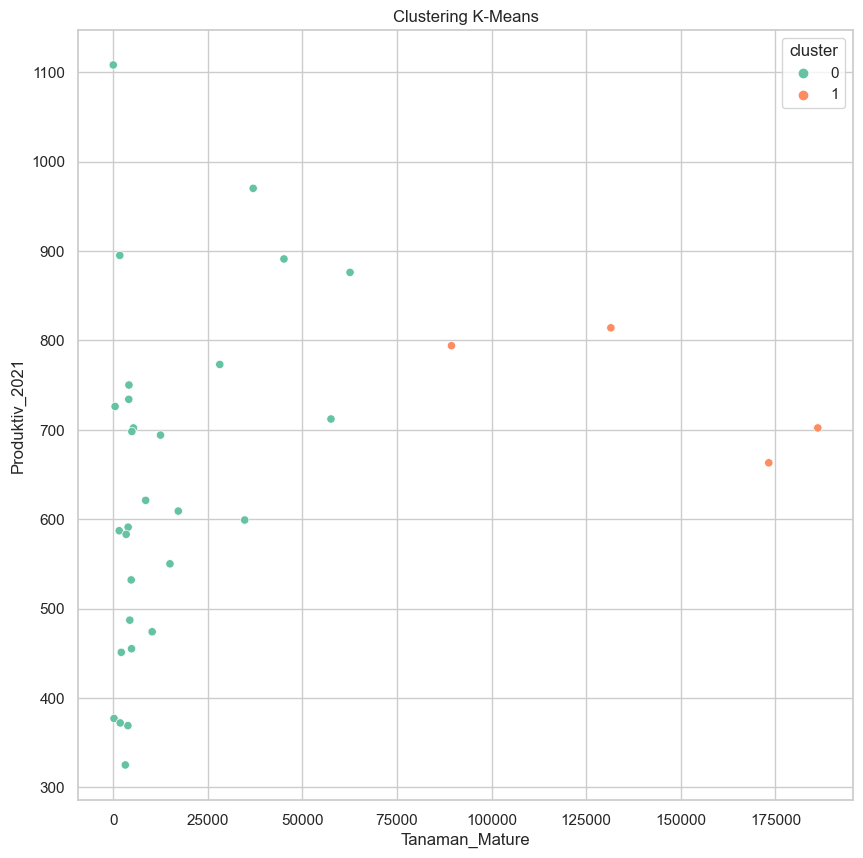

In [19]:
# plot data
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10, 10))
sns.scatterplot(x="Tanaman_Mature", y="Produktiv_2021", hue="cluster", data=df, palette="Set2")
plt.title("Clustering K-Means")
plt.show()

Elbow Method akan menghasilkan nilai SSE atau Sum of Squared Error yang semakin kecil. Semakin kecil nilai SSE maka semakin baik. namun untuk mengetahui berapa cluster yang tepat, kita bisa melihat nilai SSE yang memiliki penurunan yang signifikan selanjutnya diikuti dengan nilai yang datar atau penurunannya tidak signifikan.

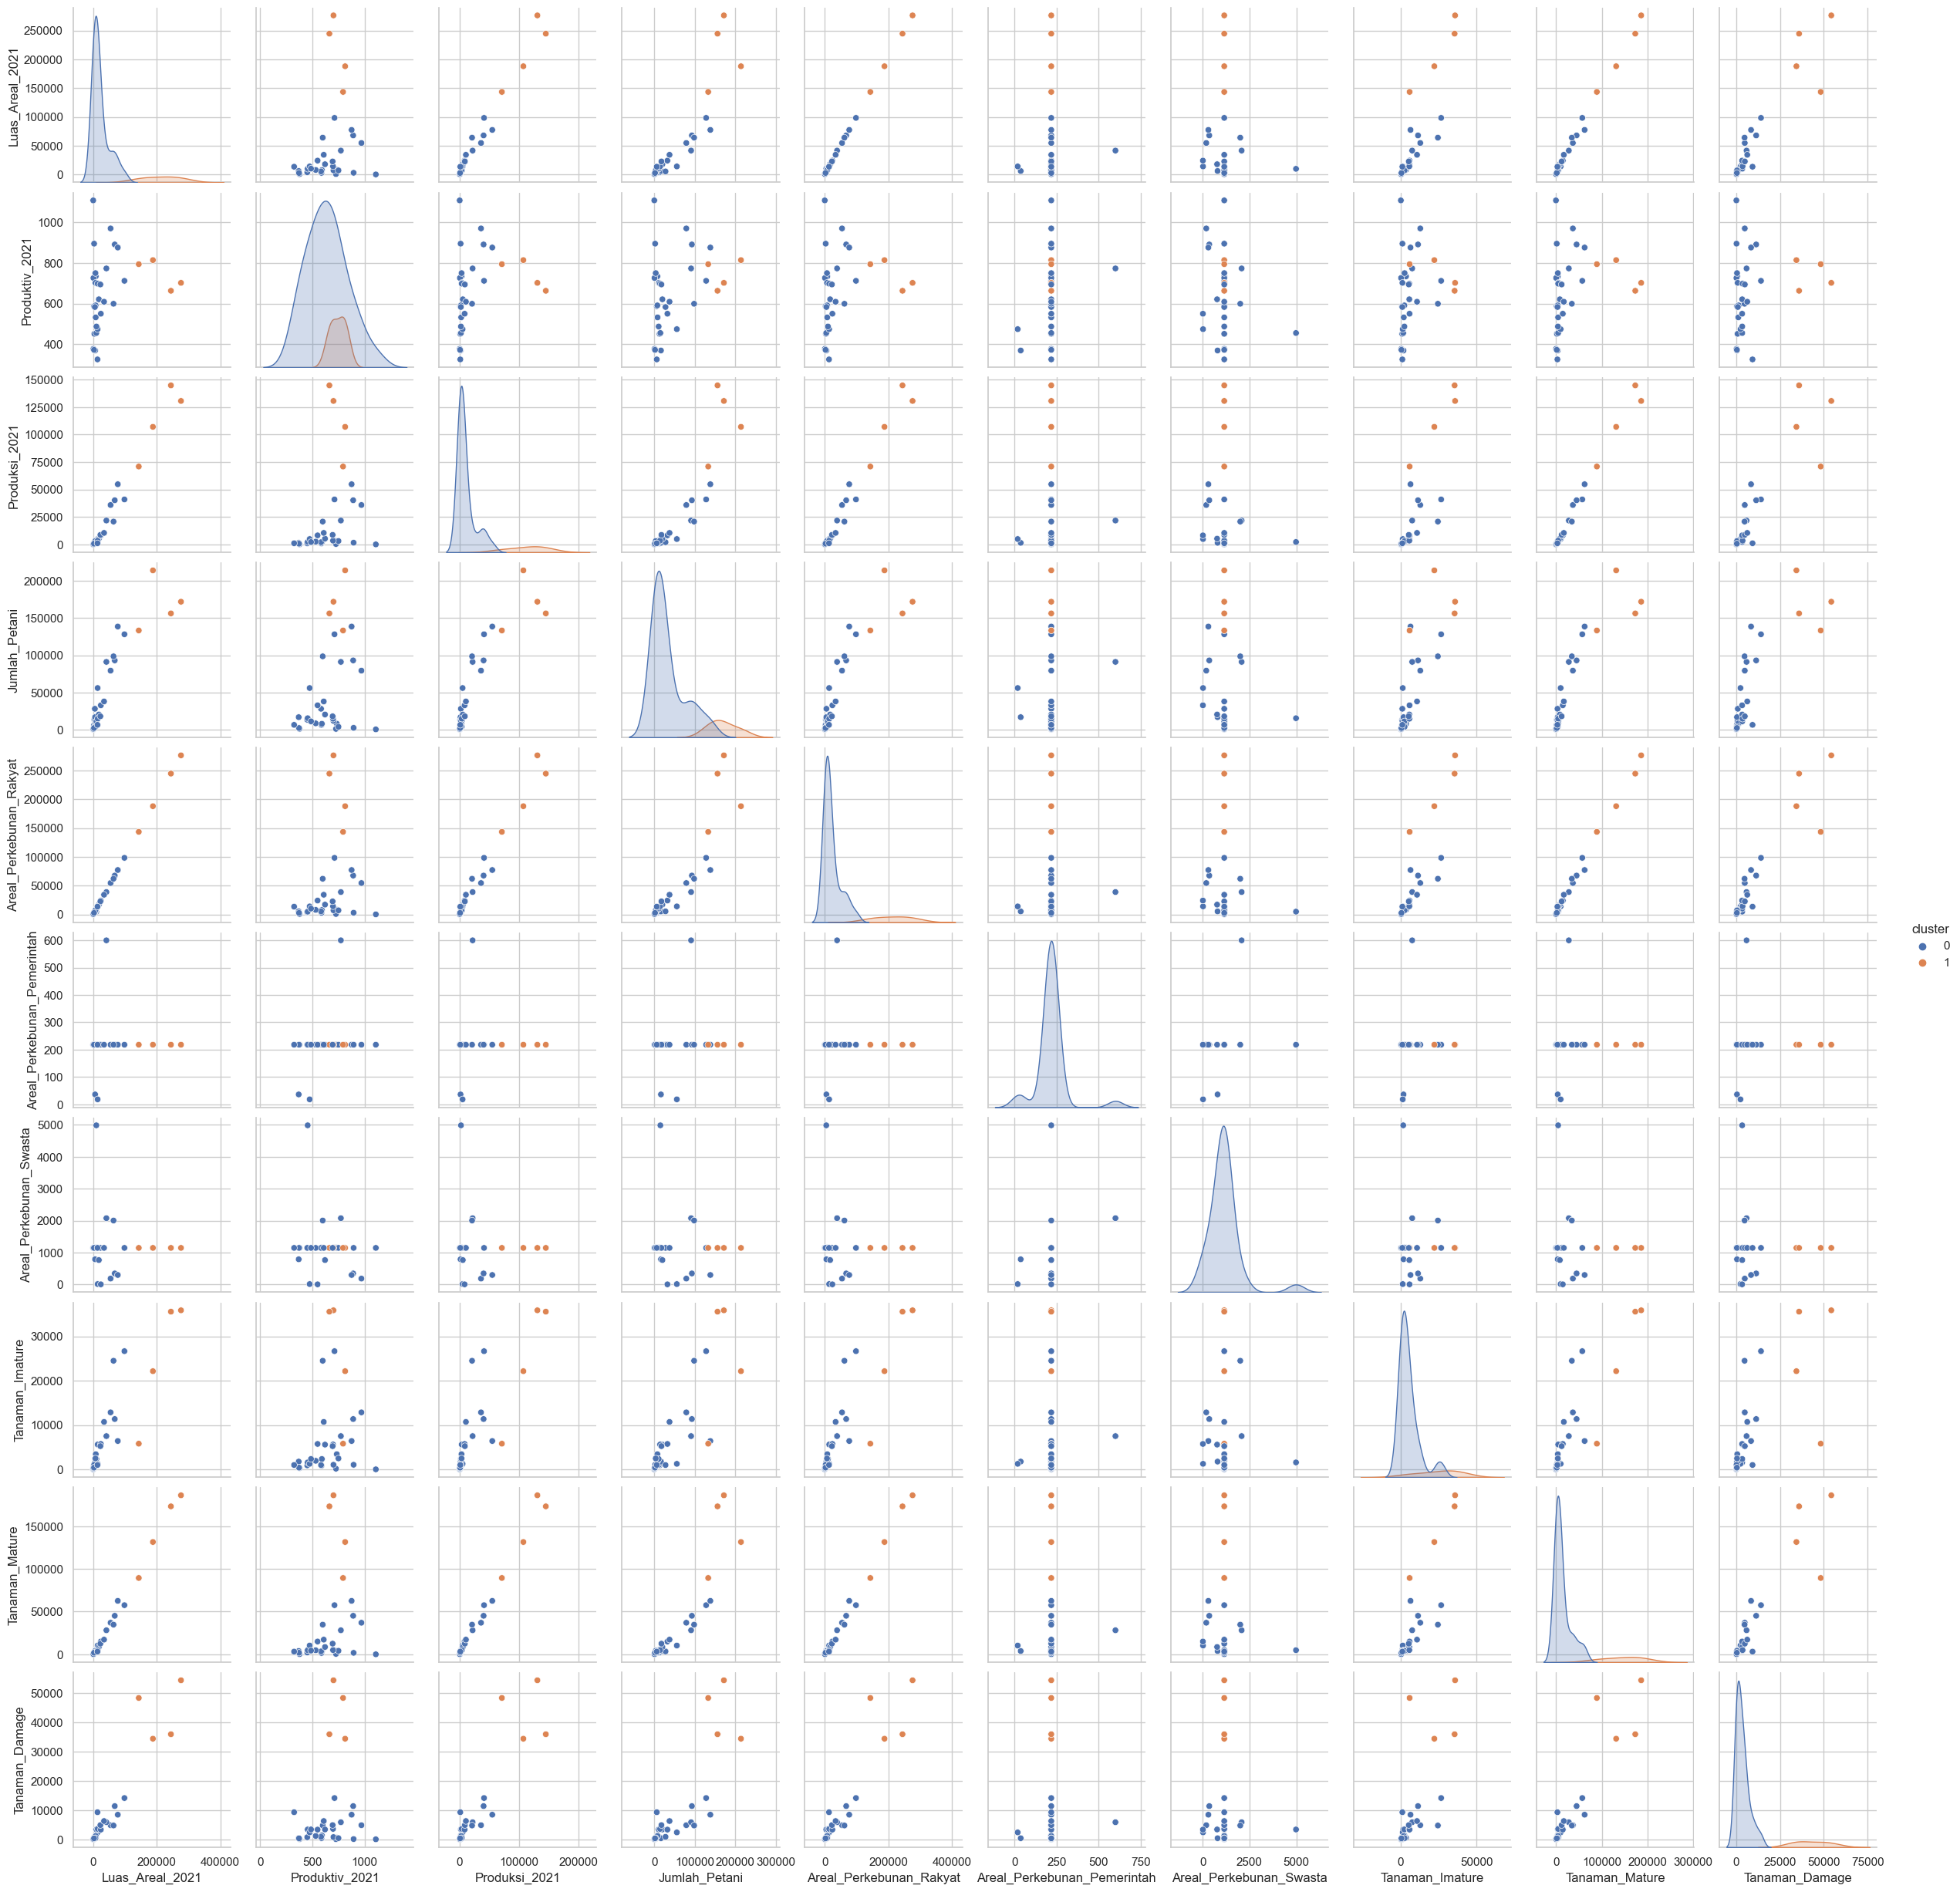

In [20]:
# import seaborn as sns
sns.pairplot(df, hue='cluster')